# IMDb Dataset Analysis

This is IMDb movies database from 1927 to 2021. <br>
Dataset taken from: https://data.world/adrianmcmahon/imdb-dataset-all-indian-movies <br>
We are going to clean the data and then analyze it to see what makes for a good rating for a movie.

**We will try to fetch all the records from IMDb with the web scrapping so that the script can be executed at any  time (Currently 306,965 titles)**
https://www.imdb.com/search/title/?country_of_origin=IN&sort=year,asc&start=1

**In this study we will try to come up with a combination of a movie that will be a success on IMDb ratings!**

**Goals**
1) Find the highest rated actor with at least 5 movies.
2) Find the highest rated director with at least 5 movies.
3) Find number of movies made in every year
4) Find best 2 actor combination for highest rating

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
from bs4 import BeautifulSoup
import requests

In [6]:
#Let's fetch data from IMDb directly
url = "https://www.imdb.com/search/title/?country_of_origin=IN&sort=year,asc&start=1"

req = requests.get(url)
soup = BeautifulSoup(req.content, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <script type="text/javascript">
   var IMDbTimer={starttime: new Date().getTime(),pt:'java'};
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <title>
   India
(Sorted by Year Ascending) - IMDb
  </title>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
  </script>
  <link href="https://www.imdb.com/search/title/?country_of_origin=IN" rel="canonical"/>
  <meta content="http://www.imdb.com/sea

In [2]:
df = pd.read_csv('/home/charmer/jupyter-notebooks/datasets/IMDb Movies India.csv')
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


**Let's sort by their rating**

In [3]:
sorted = df.sort_values(by=['Rating', "Year"], ascending=False)
sorted

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
8339,Love Qubool Hai,(2020),94 min,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari
5410,Half Songs,(2021),79 min,"Music, Romance",9.7,7,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani
2563,Breed,(2020),NaN,Drama,9.6,48,Bobby Kumar,Bobby Kumar,Ashfaq,Fasih Choudhry
6852,June,(2021),93 min,Drama,9.4,18,Suhrud Godbole,Vaibhav Khisti,Nilesh Divekar,Jitendra Joshi
14222,The Reluctant Crime,(2020),113 min,Drama,9.4,16,Arvind Pratap,Dharmendra Ahir,Awanish Kotnal,Rakhi Mansha
...,...,...,...,...,...,...,...,...,...,...
15177,Yakshya,NaN,NaN,Horror,NaN,NaN,Linkan Mahapatra,NaN,NaN,NaN
15315,Yubi Lakpi,NaN,NaN,Biography,NaN,NaN,NaN,NaN,NaN,NaN
15316,Yubi Lukpi,NaN,NaN,Drama,NaN,NaN,Omung Kumar,NaN,NaN,NaN
15337,Zahoor,NaN,NaN,Action,NaN,NaN,Pankaj Batra,Parineeti Chopra,Parmish Verma,Rahul Sharma


**Let's find a random thing in this dataset.**

In [4]:
sorted.iloc[1]

Name               Half Songs
Year                   (2021)
Duration               79 min
Genre          Music, Romance
Rating                    9.7
Votes                       7
Director          Sriram Raja
Actor 1          Raj Banerjee
Actor 2       Emon Chatterjee
Actor 3     Purshottam Mulani
Name: 5410, dtype: object




**Let's remove NaN entries**



In [5]:
dropped = sorted.dropna(subset=['Year', 'Duration', 'Rating']).reset_index(drop=True)
dropped

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,Love Qubool Hai,(2020),94 min,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari
1,Half Songs,(2021),79 min,"Music, Romance",9.7,7,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani
2,June,(2021),93 min,Drama,9.4,18,Suhrud Godbole,Vaibhav Khisti,Nilesh Divekar,Jitendra Joshi
3,The Reluctant Crime,(2020),113 min,Drama,9.4,16,Arvind Pratap,Dharmendra Ahir,Awanish Kotnal,Rakhi Mansha
4,Gho Gho Rani,(2019),105 min,"History, Romance",9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar
...,...,...,...,...,...,...,...,...,...,...
5846,Prem Aggan,(1998),168 min,"Drama, Romance",1.7,544,Feroz Khan,Fardeen Khan,Meghna Kothari,Sameer Malhotra
5847,Welcome to New York,(2018),118 min,"Comedy, Drama",1.6,774,Chakri Toleti,Richard Harris,Jasmine Kaur,Sonakshi Sinha
5848,Mumbai Can Dance Saalaa,(2015),135 min,Drama,1.6,43,Sachindra Sharma,Shakti Kapoor,Prashant Narayanan,Aditya Pancholi
5849,Desh Drohi,(2008),140 min,"Action, Thriller",1.4,"3,899",Jagdish A. Sharma,Kamal Rashid Khan,Gracy Singh,Hrishitaa Bhatt


In [6]:
new_sort = dropped.sort_values(by=["Votes"], ascending=False).reset_index(drop=True)
new_sort

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,Satyam Shivam Sundaram: Love Sublime,(1978),172 min,"Drama, Romance",7.1,999,Raj Kapoor,Shashi Kapoor,Zeenat Aman,Kanhaiyalal Chaturvedi
1,Hera Pheri,(1976),164 min,"Action, Comedy, Crime",6.8,998,Prakash Mehra,Saira Banu,Vinod Khanna,Amitabh Bachchan
2,Kurukshetra,(2000),129 min,"Action, Crime, Drama",6.0,996,Mahesh Manjrekar,Mukesh Rishi,Sanjay Dutt,Mahima Chaudhry
3,Login,(2012),125 min,"Drama, Thriller",6.1,99,Sanjeev Reddy,Himanshu Bhatt,Raadhika Singh,Akkash Basnet
4,Aatank,(1996),113 min,"Action, Thriller",3.9,99,Prem Lalwani,Desh Mukherjee,Nafisa Ali,Dharmendra
...,...,...,...,...,...,...,...,...,...,...
5846,Fugly,(2014),134 min,"Drama, Thriller",4.7,"1,008",Kabir Sadanand,Jimmy Sheirgill,Mohit Marwah,Kiara Advani
5847,Love Breakups Zindagi,(2011),156 min,"Comedy, Drama, Romance",5.8,"1,006",Sahil Sangha,Zayed Khan,Dia Mirza,Cyrus Sahukar
5848,Daud: Fun on the Run,(1997),180 min,"Action, Adventure, Comedy",5.9,"1,006",Ram Gopal Varma,Sanjay Dutt,Urmila Matondkar,Paresh Rawal
5849,Patthar Ke Phool,(1991),155 min,"Action, Drama, Romance",5.6,"1,004",Anant Balani,Salman Khan,Raveena Tandon,Kiran Kumar


Find movies by specific actor

In [7]:
srk = new_sort.loc[new_sort['Actor 1'] == "Shah Rukh Khan"].sort_values(by=["Rating"], ascending=False).reset_index(drop=True)
# srk

In [8]:
rating_by_directors = new_sort.groupby(["Director"])["Rating"].mean()
rating_by_directors = pd.DataFrame(rating_by_directors)
    
rating_by_directors = rating_by_directors.sort_values(by=["Rating"], ascending=False)
rating_by_directors

,Rating
Director,
Saif Ali Sayeed,10.0
Sriram Raja,9.7
Arvind Pratap,9.4
Munni Pankaj,9.4
Suhrud Godbole,9.4
...,...
Navin Batra,1.9
Raajeev Walia,1.8
Stanley D'Costa,1.8


In [9]:
rating_by_lead = new_sort.groupby(["Actor 1"])["Rating"].mean()
rating_by_lead = pd.DataFrame(rating_by_lead)
    
rating_by_lead = rating_by_lead.sort_values(by=["Rating"], ascending=False)
rating_by_lead

,Rating
Actor 1,
Ahaan Jha,10.0
Raj Banerjee,9.7
Vaibhav Khisti,9.4
Nishi Neha Mishra,9.4
Dharmendra Ahir,9.4
...,...
Thilakan,1.9
Lucky Kohli,1.9
Meghna Desai,1.7


Find actors with minimum 5 movies and sort them by count

In [10]:
# First group by  actors and their movie count
actors_min_five_movies = new_sort.groupby(["Actor 1"])["Votes"].count()

# Convert the series into dataframe and rename the column
actors_min_five_movies = pd.DataFrame(actors_min_five_movies).reset_index()
actors_min_five_movies.columns.values[1] = "Count Movies"

# Remove any actor with less than 5 movies
actors_min_five_movies = actors_min_five_movies.loc[actors_min_five_movies['Count Movies'] > 4].sort_values(by=["Count Movies"], ascending=False).reset_index(drop=True)

#Show the result
actors_min_five_movies

,Actor 1,Count Movies
0,Amitabh Bachchan,104
1,Mithun Chakraborty,93
2,Ashok Kumar,91
3,Dharmendra,90
4,Jeetendra,89
...,...,...
200,Ajit,5
201,Sharmila Tagore,5
202,Aditya Roy Kapoor,5
203,Paidi Jairaj,5


Group actors by mean rating and Sort descending

In [11]:
# First group by  actors and their rating
actors_by_rating = new_sort.groupby(["Actor 1"])["Rating"].mean()

# Convert the series into dataframe and rename the column
actors_by_rating = pd.DataFrame(actors_by_rating).reset_index()
actors_by_rating.columns.values[1] = "Avg Rating"

# Remove any actor with less than 5 movies
actors_by_rating = actors_by_rating.sort_values(by=["Avg Rating"], ascending=False).reset_index(drop=True)

#Show the result
actors_by_rating

,Actor 1,Avg Rating
0,Ahaan Jha,10.0
1,Raj Banerjee,9.7
2,Vaibhav Khisti,9.4
3,Nishi Neha Mishra,9.4
4,Dharmendra Ahir,9.4
...,...,...
2041,Thilakan,1.9
2042,Lucky Kohli,1.9
2043,Meghna Desai,1.7
2044,Richard Harris,1.6


**Now we join the two tables and match average rating to the actor

In [12]:
actors_and_rating = actors_min_five_movies.merge(actors_by_rating, on='Actor 1', how='left')
actors_and_rating = actors_and_rating.sort_values(by=["Avg Rating"], ascending=False).reset_index(drop=True)
actors_and_rating

,Actor 1,Count Movies,Avg Rating
0,Nargis,22,7.454545
1,Pankaj Kapur,7,7.171429
2,Irrfan Khan,17,7.152941
3,Sachin Pilgaonkar,5,7.140000
4,Balraj Sahni,13,7.130769
...,...,...,...
200,Karisma Kapoor,7,4.157143
201,Bipasha Basu,9,4.155556
202,Mallika Sherawat,5,3.520000
203,Tiger Shroff,6,3.450000


<AxesSubplot: xlabel='Actor 1'>

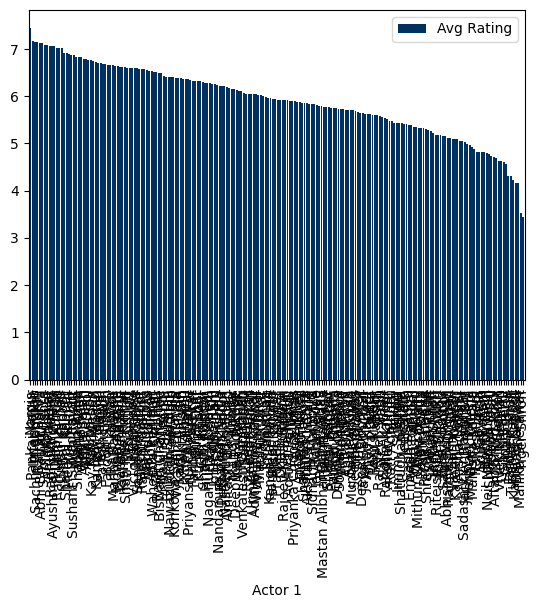

In [13]:
actors_and_rating[:204].plot(x="Actor 1", y="Avg Rating", kind="bar", color="#003060", width=0.8)